In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles, make_regression, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
np.random.seed(0)

#Introduction to SVM :

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

making a binary classification dataset

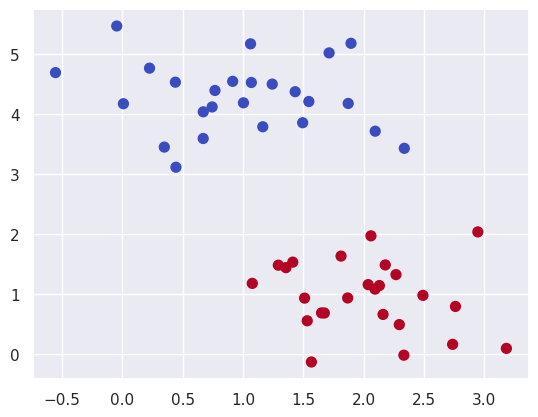

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm');

multiple boundaries separating the two classes possible .

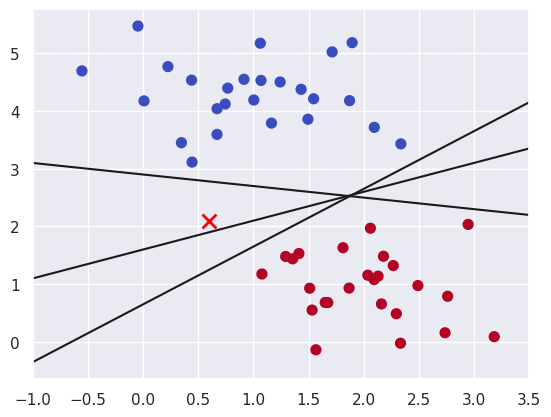

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Point X will get classified differntly for all three of them , so which is better ?

Margin

Definition : the distance between the hyperplane and the closest data points to it

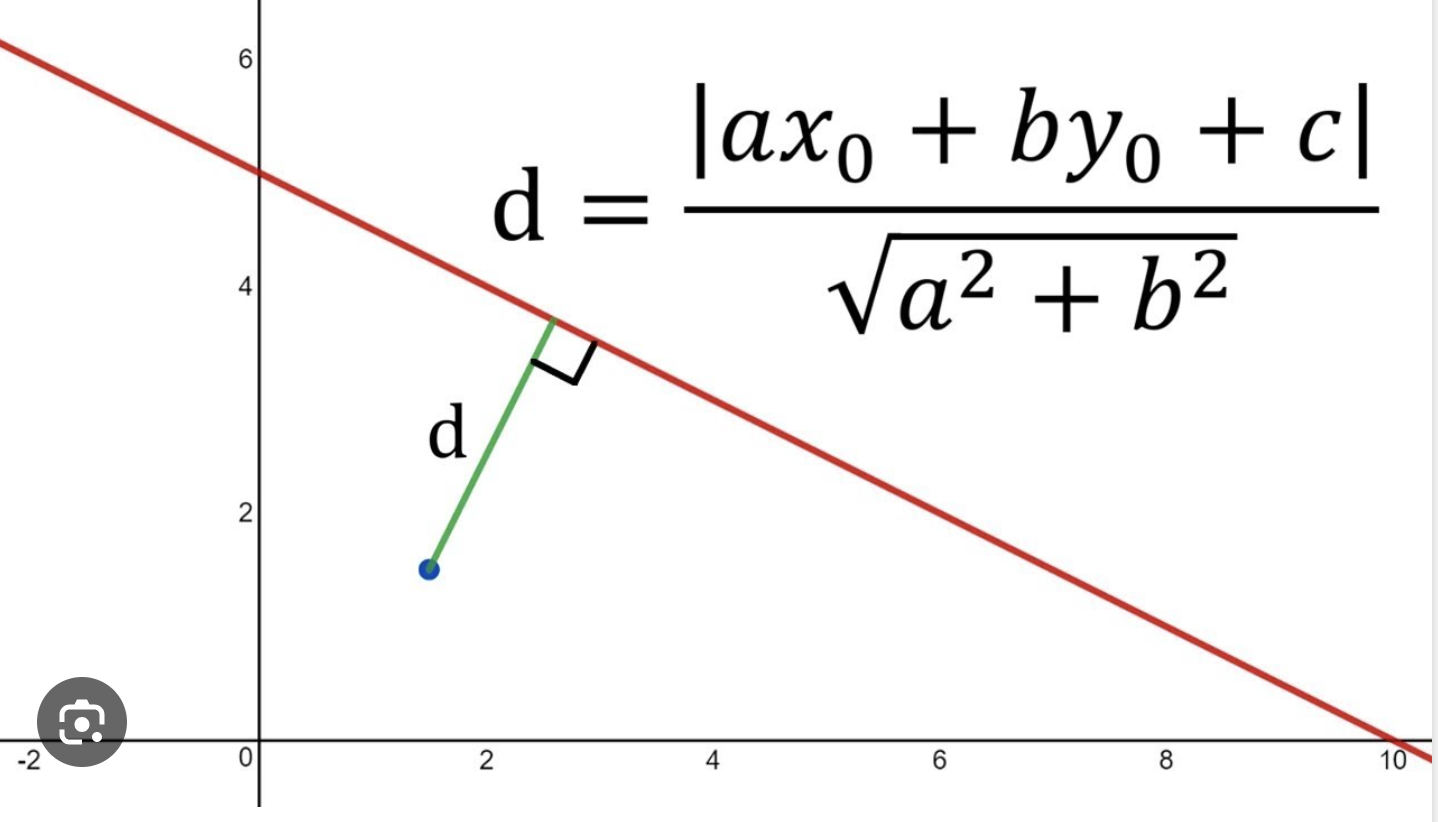

Let's Try to find out the margin for one of the line : with y = -0.2x +2.9 => y +0.2x -2.9 = 0

In [4]:
X

array([[ 1.41281595,  1.5303347 ],
       [ 1.81336135,  1.6311307 ],
       [ 1.43289271,  4.37679234],
       [ 1.87271752,  4.18069237],
       [ 2.09517785,  1.0791468 ],
       [ 2.73890793,  0.15676817],
       [ 3.18515794,  0.08900822],
       [ 2.06156753,  1.96918596],
       [ 2.03835818,  1.15466278],
       [-0.04749204,  5.47425256],
       [ 1.71444449,  5.02521524],
       [ 0.22459286,  4.77028154],
       [ 1.06923853,  4.53068484],
       [ 1.53278923,  0.55035386],
       [ 1.4949318 ,  3.85848832],
       [ 1.1641107 ,  3.79132988],
       [ 0.74387399,  4.12240568],
       [ 2.29667251,  0.48677761],
       [ 0.44359863,  3.11530945],
       [ 0.91433877,  4.55014643],
       [ 1.67467427,  0.68001896],
       [ 2.26908736,  1.32160756],
       [ 1.5108885 ,  0.9288309 ],
       [ 1.65179125,  0.68193176],
       [ 2.49272186,  0.97505341],
       [ 2.33812285,  3.43116792],
       [ 0.67047877,  4.04094275],
       [-0.55552381,  4.69595848],
       [ 2.16172321,

[2.94821884,  2.03519717]  will be the support vector for y = mx + c

In [13]:
import numpy as np
d = np.abs(0.2 * 2.94821884 + 2.03519717 - 2.9)  / np.sqrt(1.04)
print(d)

0.2698156589384395


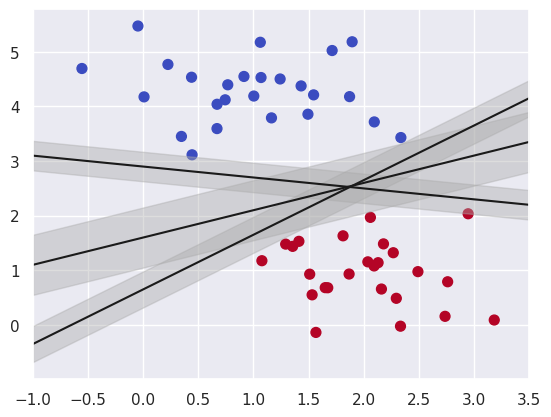

In [16]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.27)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

middle line is better as it has the highest margin

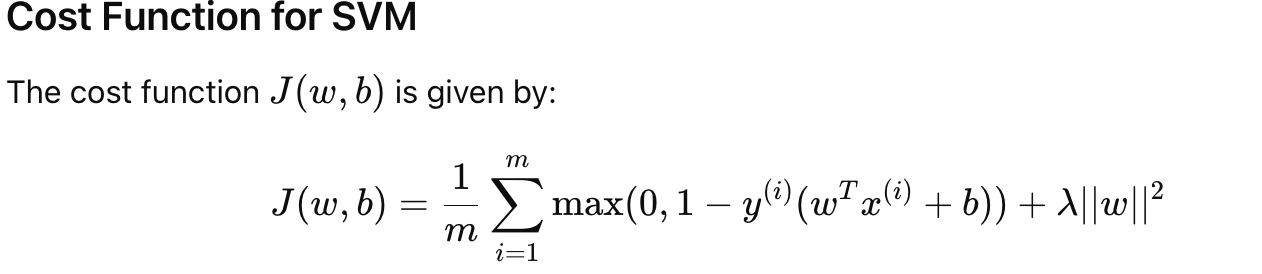

# Hard Margin SVM

In [39]:
import numpy as np
import matplotlib.pyplot as plt

class HardMarginSVM:
    def __init__(self, learning_rate=0.001, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

        # Gradient Descent
        for epoch in range(self.epochs):
            for i, x_i in enumerate(X):
                if y[i] * (np.dot(x_i, self.w) + self.b) < 1:
                    self.w += self.lr * (y[i] * x_i - 2 * (1 / self.epochs) * self.w)
                    self.b += self.lr * y[i]
                else:
                    self.w += self.lr * (-2 * (1 / self.epochs) * self.w)

        # Finding support vectors
        margin_condition = np.abs(y * (np.dot(X, self.w) + self.b) - 1) < 0.08
        self.support_vectors_ = X[margin_condition]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

    def give_xdotbplusw(self, X):
        return (np.dot(X, self.w) + self.b)

    def give_supportvectors(self):
        return self.support_vectors_

    def plot_decision_boundary(self, X, y):
        plt.figure(figsize=(8, 6))

        # Plot data points
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='Positive Class')
        plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='b', label='Negative Class')

        # Plot support vectors
        plt.scatter(self.support_vectors_[:, 0], self.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

        # Create a mesh to color the decision boundary
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Colored background
        plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)

        # Plot decision boundary and margins
        x_hyperplane = np.linspace(x_min, x_max, 100)
        y_hyperplane = -(self.w[0] * x_hyperplane + self.b) / self.w[1]

        # Margin lines
        margin = 1 / np.linalg.norm(self.w)
        y_margin_pos = y_hyperplane + margin
        y_margin_neg = y_hyperplane - margin

        plt.plot(x_hyperplane, y_hyperplane, 'k--', label='Decision Boundary')
        plt.plot(x_hyperplane, y_margin_pos, 'g--', label='Positive Margin')
        plt.plot(x_hyperplane, y_margin_neg, 'y--', label='Negative Margin')

        plt.title("Hard Margin SVM Decision Boundary with Support Vectors")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.show()
    def calculate_margin(self):
        # Margin is given by 1 / ||w||
        return 1 / np.linalg.norm(self.w)

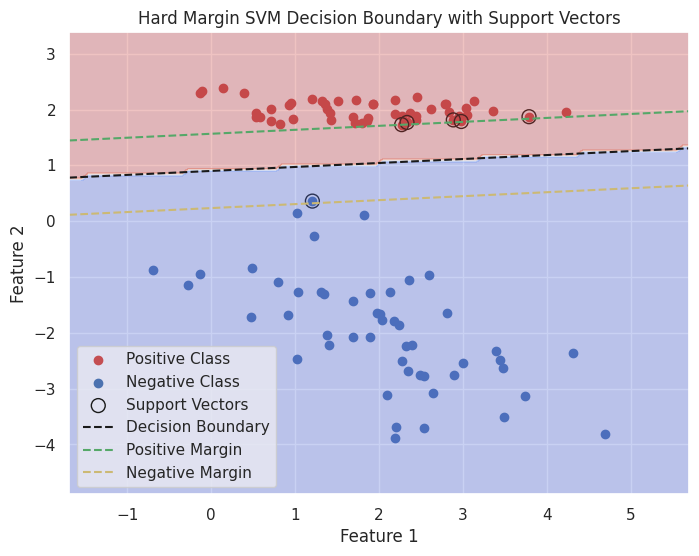

The value of margin is : 0.6656902446952229


In [40]:
# Example usage
np.random.seed(0)
from sklearn.datasets import make_classification

# Generate a linearly separable dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=2.0)
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1

# Initialize and train the SVM model
hard_svm = HardMarginSVM(learning_rate=0.001, epochs=1000)
hard_svm.fit(X, y)
hard_svm.plot_decision_boundary(X, y)
print("The value of margin is :" , hard_svm.calculate_margin())

finding value of w*x+b for differnt points

In [56]:
#Possitive Class :
print('For possitive class :',hard_svm.give_xdotbplusw([2,3]))  #It will be greater than 1

#Negative Class :
print('For negative class :',hard_svm.give_xdotbplusw([3,-2])) #It will be less than 1


#Support Vectors:
print('Support Vectors are : ', hard_svm.give_supportvectors())
print('For support vectors :',hard_svm.give_xdotbplusw([3.7838124 , 1.8715466])) #It should be nearly equal 1


#On the decision surface:
print('For the point on decision surface :',hard_svm.give_xdotbplusw([2,1])) #It shoudl be nearly equal to 0

For possitive class : 2.933171852735163
For negative class : -4.665455013533956
Support Vectors are :  [[2.2678044  1.72965014]
 [3.7838124  1.8715466 ]
 [2.97698901 1.7858526 ]
 [2.33149123 1.76889171]
 [2.88273397 1.81427914]
 [1.20493655 0.35973253]]
For support vectors : 1.052230140148913
For the point on decision surface : -0.06366285269150818


# Comparing the margin of trained SVM plane with trained logistic regression planed

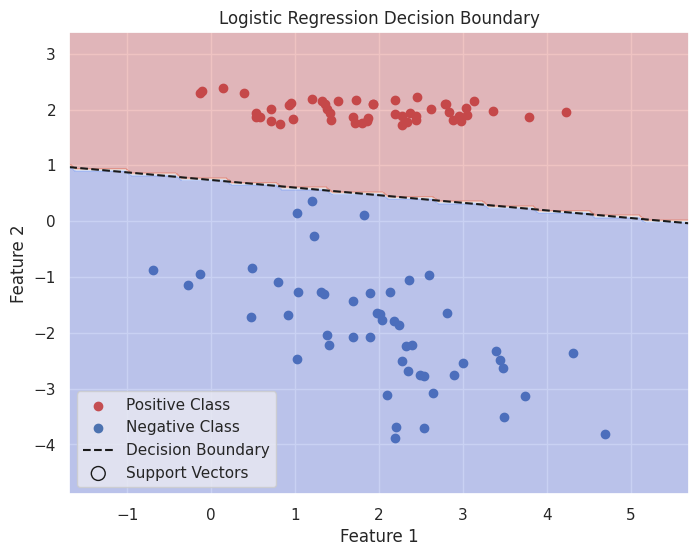

Margin-like value for Logistic Regression: 0.39341438326828776


In [29]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Function to calculate margin-like value
def calculate_margin(log_reg):
    # Get the weight vector (coefficients) and intercept
    w = log_reg.coef_[0]
    b = log_reg.intercept_[0]

    # The margin is analogous to the distance from the decision boundary to the origin
    margin = 1 / np.linalg.norm(w)
    return margin

# Function to plot decision boundary
def plot_logistic_regression_decision_boundary_with_margin(X, y, model):
    plt.figure(figsize=(8, 6))

    # Plot data points
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='Positive Class')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='b', label='Negative Class')

    # Create a mesh grid for plotting decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Colored background for decision boundary
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)

    # Plot decision boundary and margins
    w = model.coef_[0]
    b = model.intercept_[0]

    x_hyperplane = np.linspace(x_min, x_max, 100)
    y_hyperplane = -(w[0] * x_hyperplane + b) / w[1]

    # Calculate the "margin" as 1 / norm(w)
    margin = 1 / np.linalg.norm(w)


    plt.plot(x_hyperplane, y_hyperplane, 'k--', label='Decision Boundary')


    # Highlight support vectors (points close to the margin)
    decision_function = np.abs(np.dot(X, w) + b)
    support_vector_condition = decision_function < margin  # Conceptually "near" the margin
    support_vectors = X[support_vector_condition]
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

    plt.title("Logistic Regression Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()
# Plot the decision boundary
plot_logistic_regression_decision_boundary_with_margin(X, y, log_reg)

# Calculate the margin-like value for logistic regression
margin = calculate_margin(log_reg)
print(f"Margin-like value for Logistic Regression: {margin}")

#Soft Margin SVM

In [69]:
class SoftMarginSVM:
    def __init__(self, learning_rate=0.001, epochs=1000, C=1.0):
        self.lr = learning_rate
        self.epochs = epochs
        self.C = C
        self.w = None
        self.b = None

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

        # Gradient Descent
        for epoch in range(self.epochs):
            for i, x_i in enumerate(X):
                if y[i] * (np.dot(x_i, self.w) + self.b) < 1:
                    self.w += self.lr * (y[i] * x_i + -2 * self.C * self.w)
                    self.b += self.lr * y[i]
                else:
                    self.w += self.lr * (-2 * self.C * self.w)


    def calculate_slack_variables(self, X, y):
        # Calculate the slack variables for each sample
        slack_variables = np.maximum(0, 1 - y * (np.dot(X, self.w) + self.b))
        return slack_variables

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

    def plot_decision_boundary(self, X, y):
        plt.figure(figsize=(8, 6))

        # Scatter plot of data points
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='Positive Class')
        plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='b', label='Negative Class')

        # Create a mesh grid for the background colors
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

        # Predict on the mesh grid to get color coded regions
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Contour plot for decision boundaries
        plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)

        # Decision boundary and margin lines
        x_hyperplane = np.linspace(x_min, x_max, 100)
        y_hyperplane = -(self.w[0] * x_hyperplane + self.b) / self.w[1]

        # Margins
        margin = 1 / np.linalg.norm(self.w)
        y_margin_pos = y_hyperplane + margin
        y_margin_neg = y_hyperplane - margin

        plt.plot(x_hyperplane, y_hyperplane, 'k--', label='Decision Boundary')
        plt.plot(x_hyperplane, y_margin_pos, 'g--', label='Positive Margin')
        plt.plot(x_hyperplane, y_margin_neg, 'y--', label='Negative Margin')

        plt.title(f"Soft Margin SVM Decision Boundary with Margin Lines for C ={self.C}")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.show()

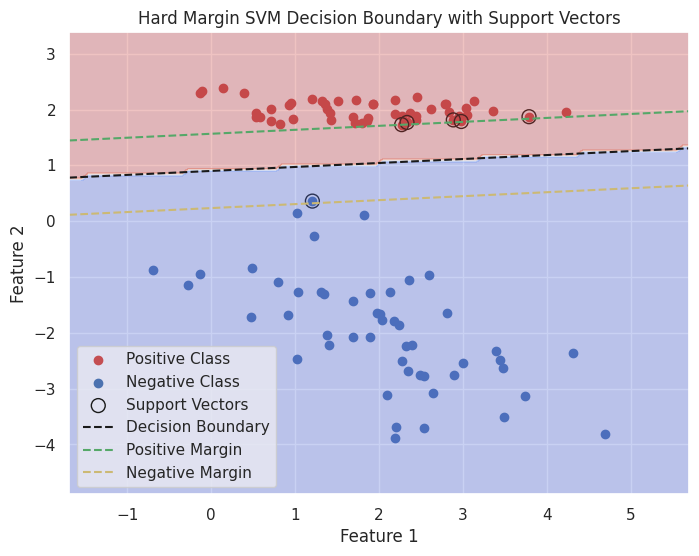

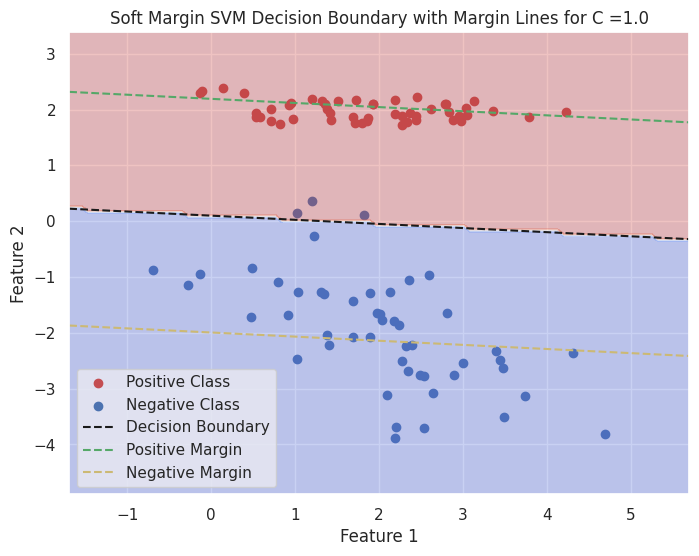

In [70]:
# 1. Hard Margin SVM vs. Soft Margin SVM
# Generate a noisy dataset
# X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, flip_y=0.1)
# y = np.where(y == 0, -1, 1)

# Hard Margin SVM on noisy data
hard_svm = HardMarginSVM(learning_rate=0.001, epochs=1000)
hard_svm.fit(X, y)
hard_svm.plot_decision_boundary(X, y)

# Soft Margin SVM on noisy data
soft_svm = SoftMarginSVM(learning_rate=0.001, epochs=1000, C=1.0)
soft_svm.fit(X, y)
soft_svm.plot_decision_boundary(X, y)

#finding the value of slack for some datapoints

In [73]:
#Possitive Class :
print('For possitive class :',soft_svm.calculate_slack_variables([2,3],soft_svm.predict([2,3])))  #It will be greater than 1

#Negative Class :
print('For negative class :',soft_svm.calculate_slack_variables([3,-2],soft_svm.predict([3,-2]))) #It will be less than 1


#Support Vectors:
# print('Support Vectors are : ', hard_svm.give_supportvectors())
print('For support vectors :',soft_svm.calculate_slack_variables([3.7838124 , 1.8715466],soft_svm.predict([3.7838124 , 1.8715466]))) #It should be nearly equal 1


#On the decision surface:
print('For the point on decision surface :',soft_svm.calculate_slack_variables([2,1],soft_svm.predict([2,1]))) #It shoudl be nearly equal to 0

For possitive class : 0.0
For negative class : 0.10580706185681799
For support vectors : 0.021883392008627545
For the point on decision surface : 0.5000292409221974


# Changing the value of c :

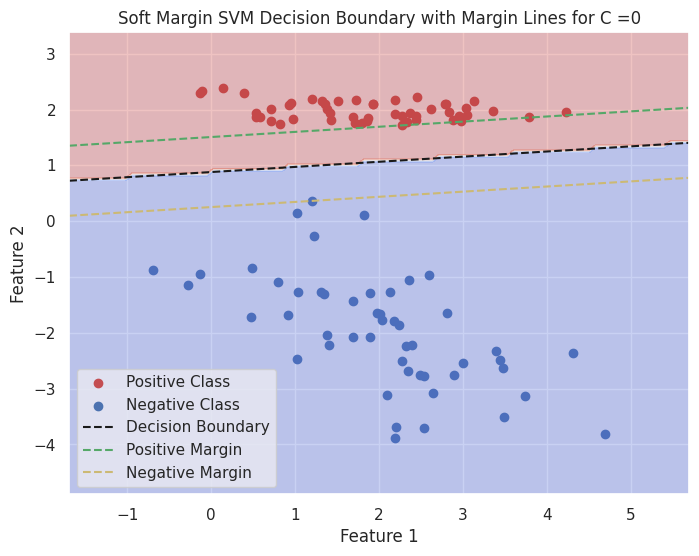

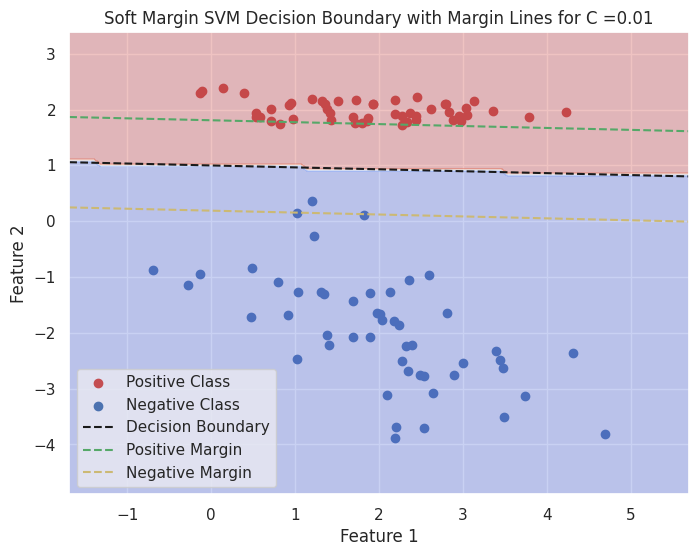

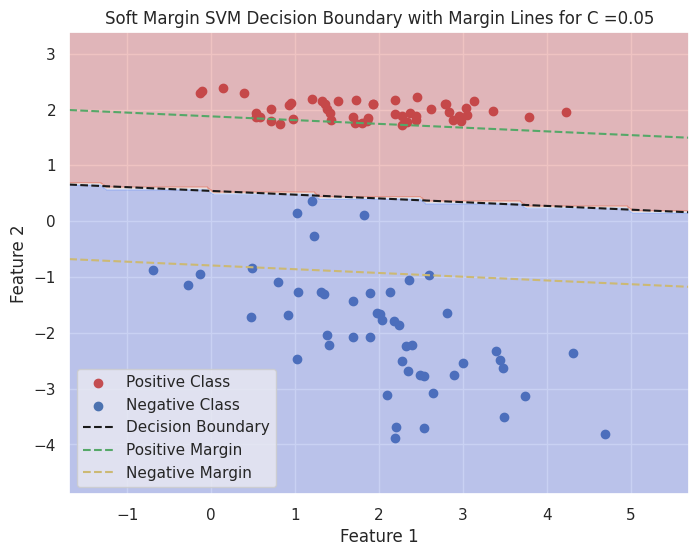

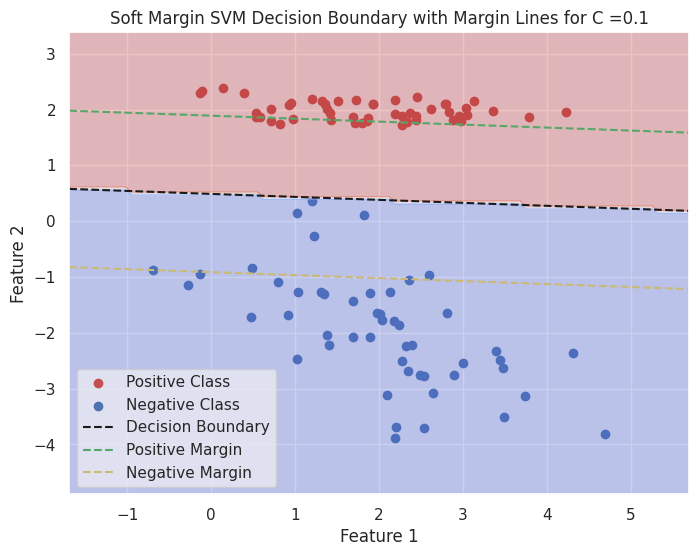

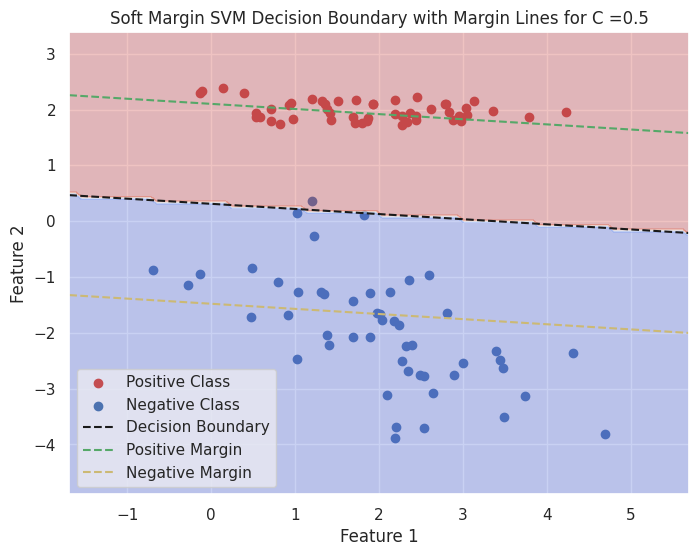

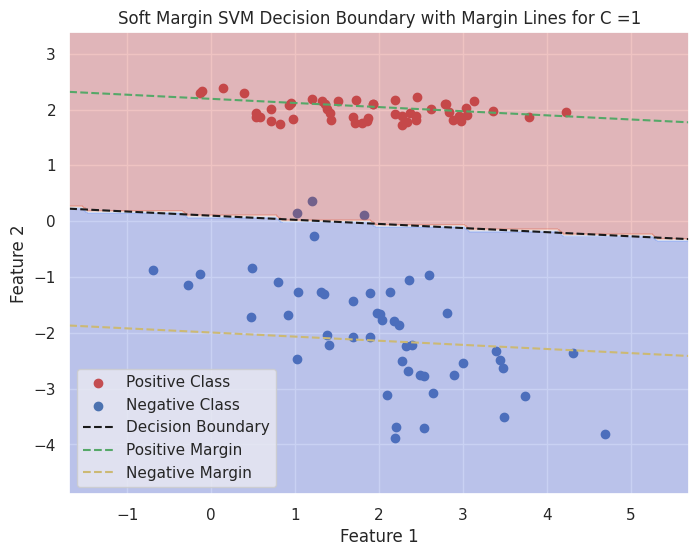

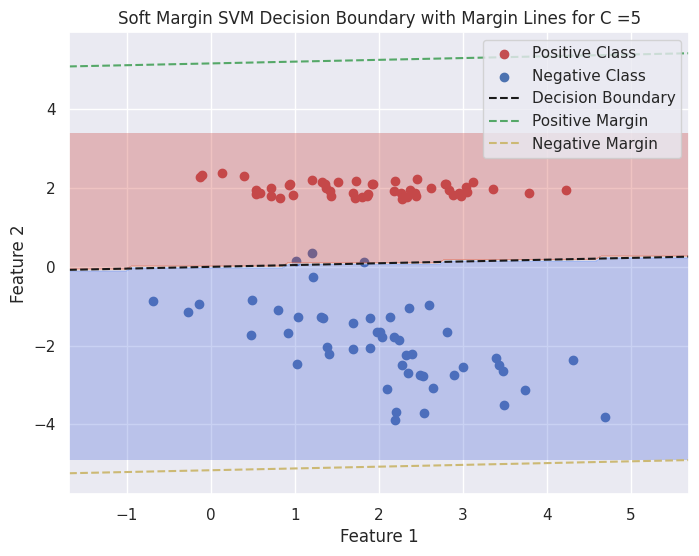

In [64]:
for c in [0,0.01,0.05,0.1,0.5,1,5]  :
  # Soft Margin SVM on noisy data
  soft_svm = SoftMarginSVM(learning_rate=0.001, epochs=1000, C=c)
  soft_svm.fit(X, y)
  soft_svm.plot_decision_boundary(X, y)

Think : Which extreme value of C causes overfitting and underfitting ?

# Kernel SVM : Optional

(100, 2) (100,)


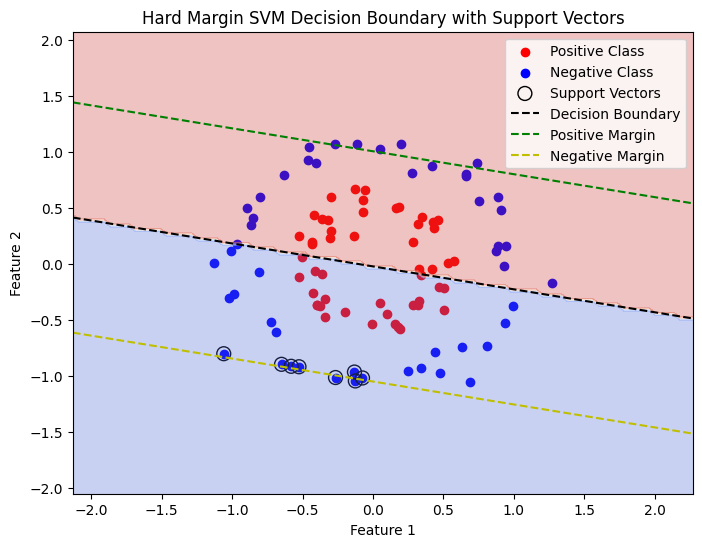

In [ ]:
# 2. SVM Kernelization
# Generate a non-linearly separable dataset
X, y = make_circles(n_samples=100, factor=0.5, noise=0.1)
y = np.where(y == 0, -1, 1)

# Linear Kernel SVM on non-linearly separable data
linear_svm = HardMarginSVM(learning_rate=0.001, epochs=1000)
print(X.shape,y.shape)
linear_svm.fit(X, y)
linear_svm.plot_decision_boundary(X, y)

In [ ]:
import numpy as np
import cvxopt
import cvxopt.solvers

cvxopt.solvers.options['show_progress'] = False

class SVM():
	def __init__(self,kernel="rbf",polyconst=1,gamma=10,degree=2):
		self.kernel = kernel
		self.polyconst = float(1)
		self.gamma = float(gamma)
		self.degree = degree
		self.kf = {
			"linear":self.linear,
			"rbf":self.rbf,
			"poly":self.polynomial
		}
		self._support_vectors = None
		self._alphas = None
		self.intercept = None
		self._n_support = None
		self.weights = None
		self._support_labels = None
		self._indices = None

	def linear(self,x,y):
		return np.dot(x.T,y)

	def polynomial(self,x,y):
		return (np.dot(x.T,y) + self.polyconst)**self.degree

	def rbf(self,x,y):
		return np.exp(-1.0*self.gamma*np.dot(np.subtract(x,y).T,np.subtract(x,y)))

	def transform(self,X):
		K = np.zeros([X.shape[0],X.shape[0]])
		for i in range(X.shape[0]):
			for j in range(X.shape[0]):
				K[i,j] = self.kf[self.kernel](X[i],X[j])
		return K

	def fit(self,data,labels):
		num_data, num_features = data.shape
		labels = labels.astype(np.double)
		K = self.transform(data)
		P = cvxopt.matrix(np.outer(labels,labels)*K)
		q = cvxopt.matrix(np.ones(num_data)*-1)
		A = cvxopt.matrix(labels,(1,num_data))
		b = cvxopt.matrix(0.0)
		G = cvxopt.matrix(np.diag(np.ones(num_data) * -1))
		h = cvxopt.matrix(np.zeros(num_data))

		alphas = np.ravel(cvxopt.solvers.qp(P, q, G, h, A, b)['x'])
		is_sv = alphas>1e-5
		self._support_vectors = data[is_sv]
		self._n_support = np.sum(is_sv)
		self._alphas = alphas[is_sv]
		self._support_labels = labels[is_sv]
		self._indices = np.arange(num_data)[is_sv]
		self.intercept = 0
		for i in range(self._alphas.shape[0]):
			self.intercept += self._support_labels[i]
			self.intercept -= np.sum(self._alphas*self._support_labels*K[self._indices[i],is_sv])
		self.intercept /= self._alphas.shape[0]
		self.weights = np.sum(data*labels.reshape(num_data,1)*self._alphas.reshape(num_data,1),axis=0,keepdims=True) if self.kernel == "linear" else None

	def signum(self,X):
		return np.where(X>0,1,-1)

	def project(self,X):
		if self.kernel=="linear":
			score = np.dot(X,self.weights)+self.intercept
		else:
			score = np.zeros(X.shape[0])
			for i in range(X.shape[0]):
				s = 0
				for alpha,label,sv in zip(self._alphas,self._support_labels,self._support_vectors):
					s += alpha*label*self.kf[self.kernel](X[i],sv)
				score[i] = s
			score = score + self.intercept
		return score

	def predict(self,X):
		return self.signum(self.project(X))

#rbf kernel or gaussian kernel

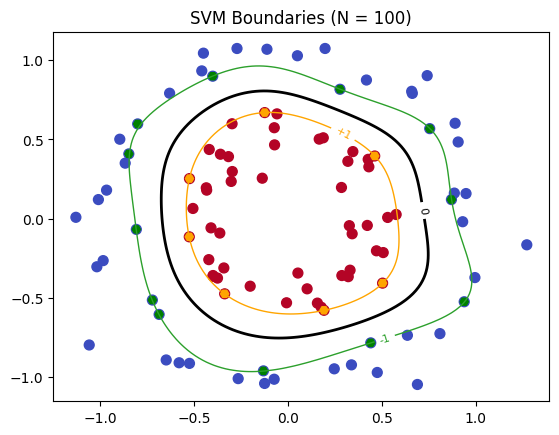

In [ ]:
model = SVM(kernel="rbf",gamma=3)

model.fit(X,y)
predictions = model.predict(X)


color = np.where(model._support_labels==1,"orange","green")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
plt.scatter(model._support_vectors[:, 0], model._support_vectors[:, 1], s=35, c=color, marker='H')
plt.title('SVM Boundaries (N = %d)' % (N))

X1, X2 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
X_T = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])

Z = model.project(X_T).reshape(X1.shape)

H = plt.contour(X1, X2, Z, [0.0], colors='k', linewidths=2, origin='lower')
H_1= plt.contour(X1, X2, Z + 1, [0.0],colors='tab:green', linewidths=1, origin='lower')
H1 = plt.contour(X1, X2, Z - 1, [0.0], colors='orange', linewidths=1, origin='lower')

plt.clabel(H,inline=True, fmt="0", fontsize=8)
plt.clabel(H_1,inline=True, fmt="-1", fontsize=8)
plt.clabel(H1,inline=True, fmt="+1", fontsize=8)
plt.axis("tight")
plt.show()

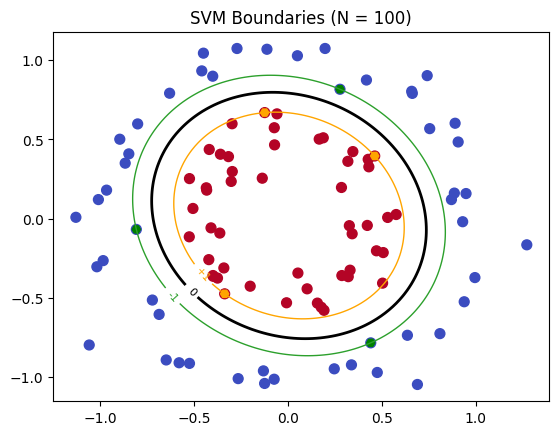

In [ ]:
model = SVM(kernel="poly",degree=2)

model.fit(X,y)
predictions = model.predict(X)


color = np.where(model._support_labels==1,"orange","green")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
plt.scatter(model._support_vectors[:, 0], model._support_vectors[:, 1], s=35, c=color, marker='H')
plt.title('SVM Boundaries (N = %d)' % (N))

X1, X2 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
X_T = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])

Z = model.project(X_T).reshape(X1.shape)

H = plt.contour(X1, X2, Z, [0.0], colors='k', linewidths=2, origin='lower')
H_1= plt.contour(X1, X2, Z + 1, [0.0],colors='tab:green', linewidths=1, origin='lower')
H1 = plt.contour(X1, X2, Z - 1, [0.0], colors='orange', linewidths=1, origin='lower')

plt.clabel(H,inline=True, fmt="0", fontsize=8)
plt.clabel(H_1,inline=True, fmt="-1", fontsize=8)
plt.clabel(H1,inline=True, fmt="+1", fontsize=8)
plt.axis("tight")
plt.show()

# SVM For Regression

In [84]:
import numpy as np
import matplotlib.pyplot as plt

class SVRegression:
    def __init__(self, C=1.0, epsilon=0.1, learning_rate=0.001, epochs=1000):
        self.C = C
        self.epsilon = epsilon
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

        # Gradient Descent
        for epoch in range(self.epochs):
            for i in range(m):
                xi = X[i]
                yi = y[i]
                prediction = np.dot(xi, self.w) + self.b
                error = yi - prediction

                if np.abs(error) > self.epsilon:
                    # Update weights and bias
                    self.w += self.learning_rate * (error * xi - self.C * self.w)
                    self.b += self.learning_rate * error

    def predict(self, X):
        return np.dot(X, self.w) + self.b

    def plot(self, X, y):
        plt.scatter(X, y, color='blue', label='Data Points')

        # Plotting the regression line
        X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        y_pred = self.predict(X_pred)
        plt.plot(X_pred, y_pred, color='red', label='SVM Regression Line')

        plt.title('SVM Regression')
        plt.xlabel('Feature')
        plt.ylabel('Target')
        plt.legend()
        plt.show()


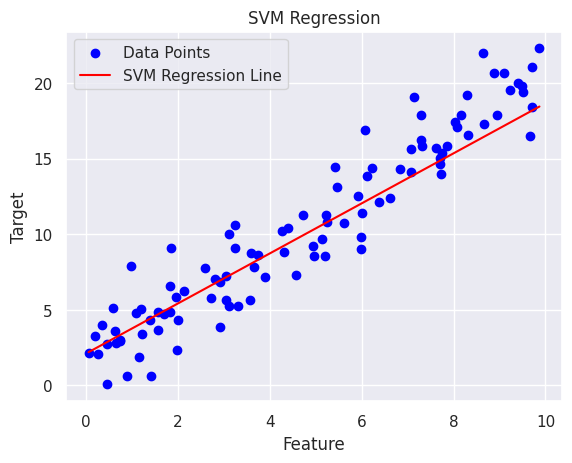

In [86]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 samples, single feature
y = 2 * X.squeeze() + 1 + np.random.randn(100) * 2  # Linear relation with noise

# Initialize and train the SVM Regression model
svm_reg = SVRegression(C=1.0, epsilon=0.5, learning_rate=0.01, epochs=1000)
svm_reg.fit(X, y)

# Plot the results
svm_reg.plot(X, y)


# SVM on Real World Dataset , Multi Class Classification through SVM

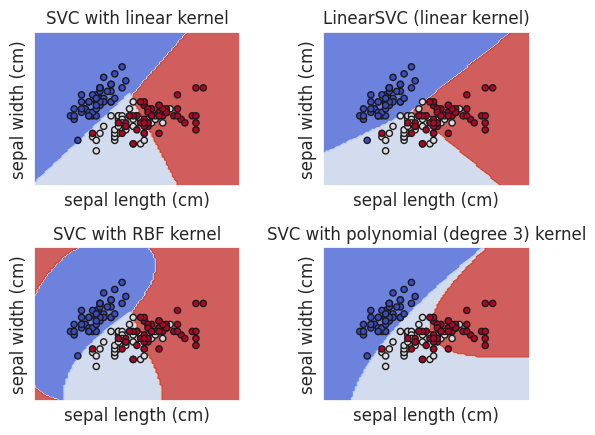

In [90]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()